In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd drive/My Drive/Colab Notebooks/TOPICS IN APPLIED STATISTICS1/5/data/gender

/content/drive/My Drive/Colab Notebooks/TOPICS IN APPLIED STATISTICS1/5/data/gender


In [0]:
import pandas as pd
import numpy as np

x = pd.read_csv('x.csv',index_col=0)
x = x.T
y = pd.read_csv('y.csv',index_col=0)
x = np.array(x)
x = x.reshape(-1,300,300,3)
y = np.array(y)

In [0]:
import numpy as np
x1=[]
y1=[]
for i in range(len(x)):
    x1.append(x[i])
    img_label=np.where(y[i]=='male',1,0)
    y1.append(img_label)
x1=np.array(x)
x=np.array(x1)/255. 
#converge 속도를 높이기 위해, normalization을 하는거임. 또한, 성능도 좋게 만듦.
# overfitting이 완벽한 초점은아님.
y=np.array(y1)
print(x.shape)

(1744, 300, 300, 3)


In [0]:
# 1. 5.1절 결과

In [0]:
import cv2
import numpy as np

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=1, stratify=y)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential


model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=[300,300,3]))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['acc'])
result=model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test))

# 300으로 늘리면, 성능이 떨어진다. (같은 convolution , maxpooling 수)
# 대표성이 점점 떨어지기 때문에 그럼.
# 그래서 픽셀의 사이즈를 더 줄여서 압축시켜야함.


(1482, 300, 300, 3) (262, 300, 300, 3) (1482, 1) (262, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 149, 149, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 74, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 128)       0         
________________________________________________________________

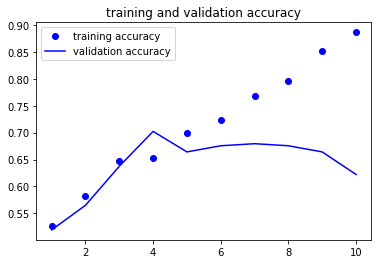

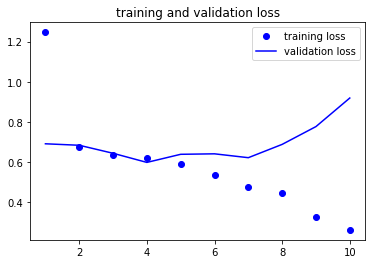

In [0]:
import matplotlib.pyplot as plt
acc=result.history['acc']
val_acc=result.history['val_acc']
loss=result.history['loss']
val_loss=result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='training accuracy')
plt.plot(epochs, val_acc,'b',label='validation accuracy')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs, val_loss,'b',label='validation loss')
plt.title('training and validation loss')
plt.legend()
#plt.show()

In [0]:
# 2. inception-v3

In [0]:
from keras.applications import inception_v3
from keras.applications.inception_v3 import preprocess_input
incep_model=inception_v3.InceptionV3(include_top=False, weights='imagenet',input_shape=(300,300,3))

x2=[]
for i in range(len(x)):
    img=x[i]
    img=preprocess_input(img.reshape(1,300,300,3)) # 전 처리시작.
    img_new=incep_model.predict(img.reshape(1,300,300,3)) # conv층만 이용해서 적용 완료 -> 8x8x2048
    x2.append(img_new)
x2=np.array(x2)
print(x2.shape)
x2=x2.reshape(x2.shape[0],x2.shape[2], x2.shape[3], x2.shape[4])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x2, y, test_size=0.15)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(1745, 1, 8, 8, 2048)
(1483, 8, 8, 2048)
(262, 8, 8, 2048)
(1483,)


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model_v3=Sequential()
model_v3.add(Conv2D(512,3,activation='relu',input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])))
model_v3.add(Flatten())
model_v3.add(Dense(512,activation='relu'))
model_v3.add(Dropout(0.5))
model_v3.add(Dense(1,activation='sigmoid'))
model_v3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_412 (Conv2D)          (None, 6, 6, 512)         9437696   
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               9437696   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 18,875,905
Trainable params: 18,875,905
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_v3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
history_v3=model_v3.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test))

Train on 1483 samples, validate on 262 samples
Epoch 1/10
1483/1483 [==============================] - 31s 21ms/step - loss: 0.0154 - acc: 0.9919 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 2/10
1483/1483 [==============================] - 31s 21ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 3/10
1483/1483 [==============================] - 31s 21ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 4/10
1483/1483 [==============================] - 31s 21ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 5/10
1483/1483 [==============================] - 31s 21ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 6/10
1483/1483 [==============================] - 31s 21ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 7/10
1483/1483 [==============================] - 31s 21ms/step - loss: 0.0000e+00 - ac

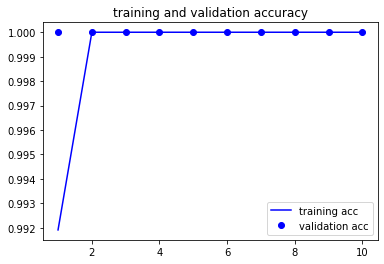

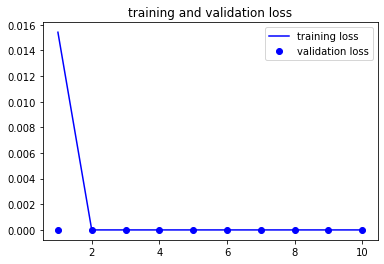

In [0]:
import matplotlib.pyplot as plt
acc=history_v3.history['acc']
val_acc=history_v3.history['val_acc']
loss=history_v3.history['loss']
val_loss=history_v3.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()


# 과제는 5장의 남녀 구별문제에서, inception v3의 inception module 적용후에,
# 성능 비교하는 것으로 이루어질거임.

In [0]:
# 3. 11page 병렬형 아키텍쳐 결과]

In [0]:
from tensorflow.keras.layers import Conv2D, AveragePooling2D, concatenate,Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import Input
image_input=Input(shape=(300,300,3)) # pixel size가 300x300
branch_a=Conv2D(64,1,activation='relu',strides=2)(image_input)
branch_b=Conv2D(64,1,activation='relu')(image_input)
branch_b=Conv2D(64,3, activation='relu',padding='same',strides=2)(branch_b)
branch_c=AveragePooling2D(2)(image_input)
branch_c=Conv2D(64,3,activation='relu',padding='same')(branch_c)
branch_d=Conv2D(64,5,activation='relu',padding='same')(image_input)
branch_d=Conv2D(64,3,activation='relu',padding='same')(branch_d)
branch_d=Conv2D(64,3,activation='relu',padding='same',strides=2)(branch_d)
concatenated=concatenate([branch_a,branch_b,branch_c,branch_d],axis=-1)
x1 = GlobalAveragePooling2D()(concatenated)
x1 = Dense(32,activation='relu')(x1)
x1 = Dropout(0.5)(x1)
out=Dense(1, activation='sigmoid')(x1)
model=Model(image_input,out)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, 300, 300, 64) 4864        input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 300, 300, 64) 256         input_4[0][0]                    
__________________________________________________________________________________________________
average_pooling2d_3 (AveragePoo (None, 150, 150, 3)  0           input_4[0][0]                    
____________________________________________________________________________________________

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.15)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
47/47 [==============================] - 59s 1s/step - loss: 0.6944 - acc: 0.5283 - val_loss: 0.6927 - val_acc: 0.5038
Epoch 2/10
47/47 [==============================] - 59s 1s/step - loss: 0.6909 - acc: 0.5283 - val_loss: 0.6837 - val_acc: 0.5840
Epoch 3/10
47/47 [==============================] - 59s 1s/step - loss: 0.6888 - acc: 0.5337 - val_loss: 0.6817 - val_acc: 0.5916
Epoch 4/10
47/47 [==============================] - 59s 1s/step - loss: 0.6886 - acc: 0.5250 - val_loss: 0.6786 - val_acc: 0.6031
Epoch 5/10
47/47 [==============================] - 59s 1s/step - loss: 0.6869 - acc: 0.5432 - val_loss: 0.6822 - val_acc: 0.5191
Epoch 6/10
47/47 [==============================] - 58s 1s/step - loss: 0.6871 - acc: 0.5533 - val_loss: 0.6739 - val_acc: 0.6183
Epoch 7/10
47/47 [==============================] - 58s 1s/step - loss: 0.6851 - acc: 0.5722 - val_loss: 0.6732 - val_acc: 0.6145
Epoch 8/10
47/47 [==============================] - 59s 1s/step - loss: 0.6840 - acc: 0.56

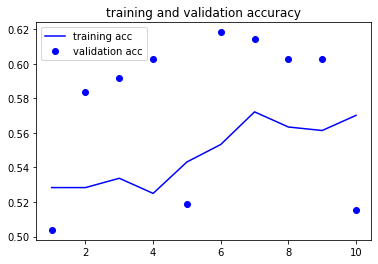

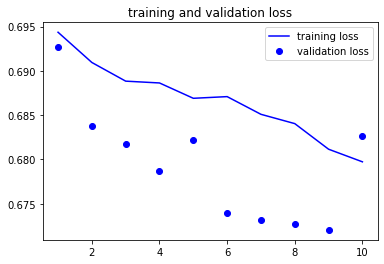

In [0]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()
